### Importing Libraries

---

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Custom Seaborn Style

---

In [3]:
sns.set_theme('paper')
sns.set_style('ticks')

### Adding `utils` to `PYTHONPATH`

---

In [4]:
sys.path.append(os.path.abspath("../utils"))


### Reading Parquet File

---

In [5]:
# Importing load_parquet function from read_data module
from read_data import load_parquet
cars = load_parquet('clean_data', 'clean_data.parquet')
cars.head()

,km_driven,fuel_type,transmission,owner,engine_capacity,price,year,brand,model
0,46610,Petrol,Manual,3rd owner,814,176000,2013,Hyundai,Eon
1,72110,Petrol,Manual,2nd owner,796,212000,2014,Maruti,Alto 800
2,44480,Petrol,Manual,1st owner,998,337000,2015,Maruti,Wagon R 1.0
3,75340,Petrol,Automatic,1st owner,1199,446000,2018,Tata,Tiago
4,69740,Petrol,Manual,2nd owner,1197,263000,2012,Hyundai,i20


### Handling `year` Column

---

In [6]:
# Frequency Distribution of "year" column
cars['year'].value_counts()

year
2022    481
2021    472
2017    400
2018    398
2019    372
2016    370
2015    353
2020    318
2023    305
2013    299
2014    290
2012    228
2011    217
2010    195
2024    155
2025      3
2007      2
Name: count, dtype: int64

In [7]:
# As we can see, 2007 and 2025 are very rare in our data occuring only 1 time as compared to other values
# So it's better to remove them, because model can't learn any pattern of year 2007 or 2025 with just 1 value
# And it can also cause model to overfit instead of learning meaningful patterns
cars = cars[(cars['year']!=2007) & (cars['year']!=2025)]

### Handling `transmission` Column

---

In [8]:
# Frequency Distribution of "transmission" column
cars['transmission'].value_counts()

transmission
Manual       3517
Automatic    1336
Name: count, dtype: int64

### Handling `owner` Column

---

In [9]:
# Frequency Distribution of "owner" column
cars['owner'].value_counts()

owner
1st owner    3016
2nd owner    1363
3rd owner     380
4th owner      79
5th owner      12
7th owner       2
6th owner       1
Name: count, dtype: int64

In [10]:
# As we can see, categories in "owner" column like "5th owner" and "6th owner" are very rare as compared to other values
# So we will remove "5th owner" and "6th owner" from "owner" column
# And since "4th owner" is also significantly less occuring than other categories, we will rename it to "Others"
# This way we will reduce overfitting and help model learn and generalize better
cars = cars[cars['owner'].isin(['1st owner','2nd owner','3rd owner','4th owner'])]

In [11]:
# Because we have converted "owner" column into category datatype, we also have to remove unused categories manually
cars['owner'] = cars['owner'].cat.remove_unused_categories()

In [12]:
# Renaming "4th owner" as "Others"
cars['owner'] = cars['owner'].cat.rename_categories({'4th owner':'Others'})

In [13]:
# Frequency Distribution of "owner" column after transformation
cars['owner'].value_counts()

owner
1st owner    3016
2nd owner    1363
3rd owner     380
Others         79
Name: count, dtype: int64

### Handling `fuel_type` Column

---

In [14]:
# Frequency Distribution of "fuel_type" column
cars['fuel_type'].value_counts()

fuel_type
Petrol      3477
Diesel      1226
CNG           93
Electric      39
Name: count, dtype: int64

In [15]:
# Average price based on "fuel_type" column
# Hybrid cars are very rare in our data but their average price is very high as compared to other categories
# It makes Hybrid cars rare and dominant category which can cause overfitting and create problem in generalization of model
cars.groupby('fuel_type', observed=True)['price'].mean().apply(lambda x: round(x)).sort_values()

fuel_type
CNG          512376
Petrol       571188
Diesel       737746
Electric    1026821
Name: price, dtype: int64

In [16]:
# Because we have converted "fuel_type" column into category datatype, we also have to remove unused categories manually
cars['fuel_type'] = cars['fuel_type'].cat.remove_unused_categories()

In [17]:
# Frequency Distribution of "fuel_type" column after transformation
cars['fuel_type'].value_counts()

fuel_type
Petrol      3477
Diesel      1226
CNG           93
Electric      39
Name: count, dtype: int64

### Handling `fuel_type` Column

---

In [18]:
cars['fuel_type'].value_counts()

fuel_type
Petrol      3477
Diesel      1226
CNG           93
Electric      39
Name: count, dtype: int64

In [19]:
# Average price based on "fuel_type" column
# Hybrid cars are very rare in our data but their average price is very high as compared to other categories
# It makes Hybrid cars rare and dominant category which can cause overfitting and create problem in generalization of model
cars.groupby('fuel_type', observed=True)['price'].mean().apply(lambda x: round(x)).sort_values()

fuel_type
CNG          512376
Petrol       571188
Diesel       737746
Electric    1026821
Name: price, dtype: int64

In [20]:
# So we will remove Hybrid cars from the data
cars = cars[~cars['fuel_type'].isin(['Hybrid'])]

In [21]:
# Because we have converted "fuel_type" column into category datatype, we also have to remove unused categories manually
cars['fuel_type'] = cars['fuel_type'].cat.remove_unused_categories()

In [22]:
# Frequency Distribution of "fuel_type" column after transformation
cars['fuel_type'].value_counts()

fuel_type
Petrol      3477
Diesel      1226
CNG           93
Electric      39
Name: count, dtype: int64

### Handling `km_driven` Column

---

- 99th percentile of 'km_driven' column is 1,90,000 which means that 99% of the data points lie below 1,90,000.
- However, the maximum value is 7,00,000 which is significantly higher than the rest of the distribution.
- This extreme value is likely an outlier and may distort statistical analyses such as the mean or standard deviation.
- Therefore, it should be carefully examined and handled appropriately.


In [23]:
# Description of "km_driven" column
km_describe = cars.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])['km_driven'].apply(lambda x: f"{x:.2f}")
km_describe

count       4838.00
mean       68265.16
std        58548.68
min         1050.00
1%          4438.50
5%         12548.50
10%        19977.00
25%        35682.50
50%        59000.00
75%        87790.00
90%       120000.00
95%       150000.00
99%       216300.00
max      1500000.00
Name: km_driven, dtype: object

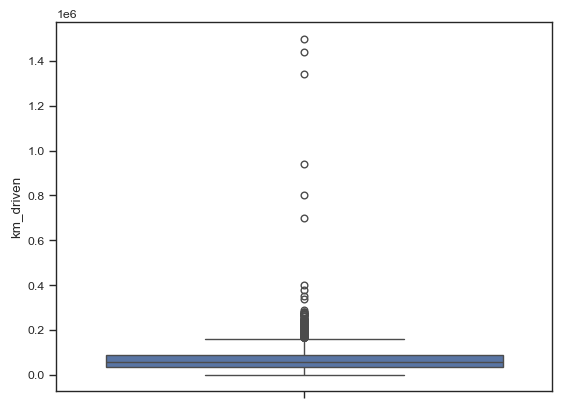

In [24]:
# Box Plot of "km_driven" column
sns.boxplot(cars['km_driven'])
plt.show()

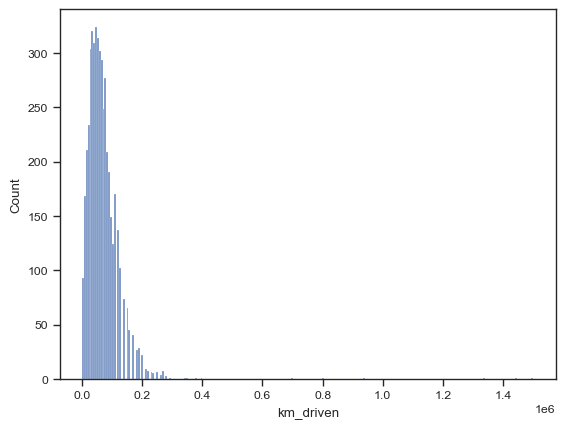

In [25]:
# Distribution of "km_driven" column
sns.histplot(cars['km_driven'])
plt.show()

- Since the distribution of 'km_driven' column is skewed, methods like Z-Score may not be reliable.
- Instead, we apply the Interquartile Range (IQR) method, which is robust to skewness and extreme values.
$$IQR = Q3 - Q1$$
where:
- $Q1$ is 25th percentile
- $Q3$ is 75th percentile

In [26]:
# First quartile or 25th percentile
q1 = cars['km_driven'].quantile(0.25)

# Third quartile or 75th percentile
q3 = cars['km_driven'].quantile(0.75)

In [27]:
# IQR = Q3 - Q1
iqr = q3 - q1

- To eliminate the most extreme outliers, we use a stricter threshold :
$$\text{Lower Limit} = Q1 - 3 \times \text{IQR}$$
$$\text{Upper Limit} = Q3 + 3 \times \text{IQR}$$
- Any value outside this range is considered an extreme outlier and is removed from the dataset.
- This way we can preserves as much data as possible, while reducing the impact of extreme values.

In [28]:
# Range of Extreme Outliers
extreme_lower_limit = q1 - 3*iqr
extreme_upper_limit = q3 + 3*iqr

In [29]:
# Detecting Extreme Outliers
cars[(cars['km_driven'] < extreme_lower_limit) | (cars['km_driven'] > extreme_upper_limit)]

,km_driven,fuel_type,transmission,owner,engine_capacity,price,year,brand,model
1207,700000,Diesel,Manual,1st owner,1248,210000,2014,Fiat,Grand Punto
1256,250000,Petrol,Manual,1st owner,1197,219000,2010,Maruti,Swift
1315,260000,Diesel,Manual,2nd owner,1248,190000,2012,Fiat,Grand Punto
1603,250000,Diesel,Manual,1st owner,1399,152000,2011,Ford,Figo
1732,1440000,Petrol,Automatic,3rd owner,1798,425000,2015,Skoda,Octavia
2068,380000,Diesel,Manual,1st owner,1498,371000,2014,Ford,Fiesta
2178,250000,Diesel,Manual,2nd owner,2489,360000,2017,Mahindra,Xylo
2223,270000,Diesel,Manual,3rd owner,2494,709000,2014,Toyota,Innova
2295,1500000,Petrol,Manual,1st owner,1498,1246000,2022,Skoda,KUSHAQ
2431,270000,Diesel,Manual,1st owner,1498,516000,2015,Ford,Ecosport


In [30]:
# Index of Extreme Outliers
extreme_outlier_idx = cars[(cars['km_driven'] < extreme_lower_limit) | (cars['km_driven'] > extreme_upper_limit)].index
extreme_outlier_idx

Index([1207, 1256, 1315, 1603, 1732, 2068, 2178, 2223, 2295, 2431, 2458, 2474,
       2484, 2591, 2655, 2673, 2682, 3032, 3205, 3415, 3489, 3724, 3750, 3753,
       3802, 3823, 3825, 4674, 4678, 4705, 4724],
      dtype='int64')

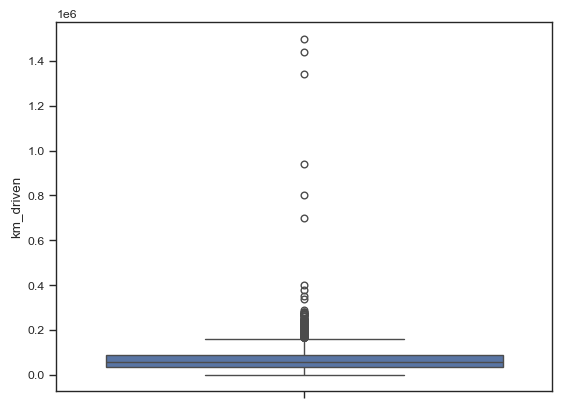

In [31]:

sns.boxplot(cars['km_driven'])
plt.show()

In [32]:
extreme_outlier_idx = cars[(cars['km_driven'] < extreme_lower_limit) | (cars['km_driven'] > extreme_upper_limit)].index
extreme_outlier_values = cars.loc[extreme_outlier_idx, 'km_driven']

for idx, val in extreme_outlier_values.items():
    print(f"Index: {idx}, Value: {val}")


Index: 1207, Value: 700000
Index: 1256, Value: 250000
Index: 1315, Value: 260000
Index: 1603, Value: 250000
Index: 1732, Value: 1440000
Index: 2068, Value: 380000
Index: 2178, Value: 250000
Index: 2223, Value: 270000
Index: 2295, Value: 1500000
Index: 2431, Value: 270000
Index: 2458, Value: 340000
Index: 2474, Value: 940000
Index: 2484, Value: 800000
Index: 2591, Value: 280000
Index: 2655, Value: 250000
Index: 2673, Value: 260000
Index: 2682, Value: 270000
Index: 3032, Value: 250000
Index: 3205, Value: 280000
Index: 3415, Value: 270000
Index: 3489, Value: 400000
Index: 3724, Value: 270000
Index: 3750, Value: 260000
Index: 3753, Value: 270000
Index: 3802, Value: 280000
Index: 3823, Value: 290000
Index: 3825, Value: 350000
Index: 4674, Value: 1340000
Index: 4678, Value: 250000
Index: 4705, Value: 270000
Index: 4724, Value: 260000


In [33]:
updated_cars = cars.drop(index=extreme_outlier_idx, axis=0)

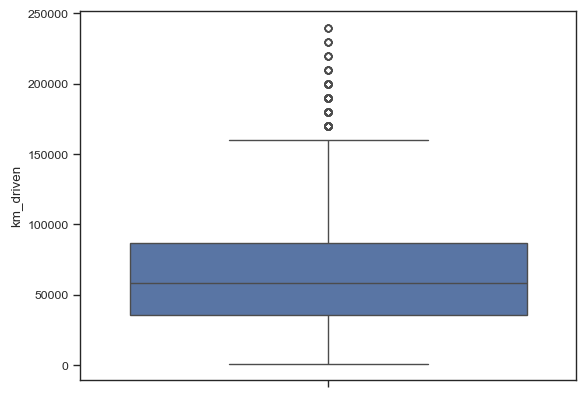

In [34]:
# Box Plot of "km_driven" column after Outlier Removal
sns.boxplot(updated_cars['km_driven'])
plt.show()

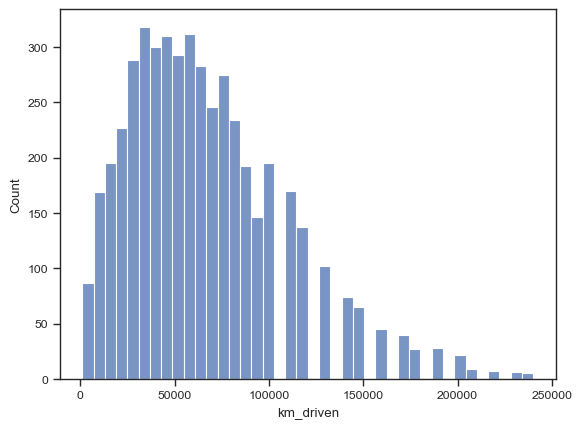

In [35]:
# Distribution of "km_driven" column after Outlier Removal
sns.histplot(updated_cars['km_driven'])
plt.show()

<details>
  <summary style="color:white;background:Navy;font-weight:bold; cursor:pointer;"><b>📊 Analysis of km_driven Distribution (Click to expand)</b></summary>

  <h4>⚡ Shape of the distribution</h4>
  <ul>
    <li>✅ Most cars have mileage between <b>20,000 and 80,000 km</b> (the tallest bars).</li>
    <li>✅ The distribution is <b>right-skewed</b> (long tail to the right), meaning a few cars have very high mileage (1.5–2.5 lakh km), but they are rare.</li>
  </ul>

  <h4>⚡ Central tendency</h4>
  <ul>
    <li>✅ The <b>peak (mode)</b> seems around <b>40,000–60,000 km</b>, meaning that’s the most common driven range for cars in your dataset.</li>
  </ul>

  <h4>⚡ Spread (range)</h4>
  <ul>
    <li>✅ <b>Minimum:</b> close to 0 km (likely brand-new cars or data errors).</li>
    <li>✅ <b>Maximum:</b> up to ~2,40,000 km.</li>
    <li>✅ Wide spread indicates <b>high variance</b> in car usage.</li>
  </ul>

  <h4>⚡ Outliers</h4>
  <ul>
    <li>✅ Very few cars with mileage above <b>1.5 lakh km</b>.</li>
    <li>✅ These are <b>extreme outliers</b>, which can distort model training (e.g., regression may overfit if you don’t handle them).</li>
  </ul>

  <h4>⚡ Possible data issues</h4>
  <ul>
    <li>✅ Cars with <b>0 km</b> might not be realistic (could be unsold listings or missing values encoded as 0).</li>
  </ul>

</details>


-----------------------------

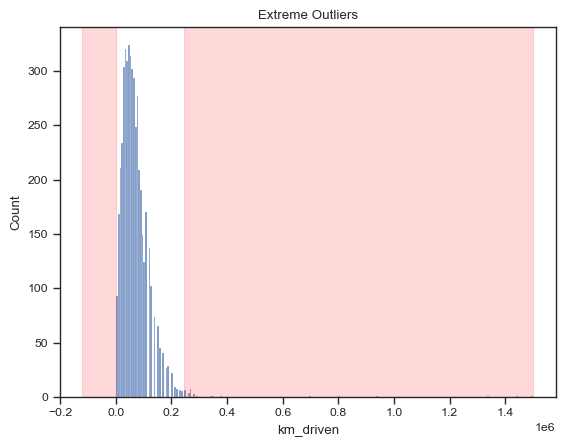

In [36]:
# Visual Representation of Outliers in the Data
sns.histplot(cars['km_driven'])
plt.axvspan(xmin=extreme_lower_limit, xmax=cars['km_driven'].min(), alpha=0.15, color='red')
plt.axvspan(xmin=extreme_upper_limit, xmax=cars['km_driven'].max(), alpha=0.15, color='red')
plt.title('Extreme Outliers')
plt.show()

<details>
  <summary style="color:white;background:navy;font-weight:bold; cursor:pointer;">
    <b>🚩 Extreme Outliers in km_driven (Click to expand)</b>
  </summary>

  <h4>⚡ Main Distribution</h4>
  <ul>
<li>The bulk of cars are between 20,000–150,000 km.</li>
<li>The peak (mode) is 40,000–60,000 km → typical used car mileage.</li>
  </ul>

  <h4>⚡ Outliers</h4>
  <ul>
    <li>🚩 <b>Right Side:</b> Cars above <b>~2.5 lakh km</b> are extremely rare and considered outliers.</li>
    <li>🚩 <b>Left Side:</b> Negative or near-zero km values are unrealistic and likely <b>data entry errors</b>.</li>
  </ul>

  <h4>⚡ Conclusion</h4>
  <ul>
    <li>✅ Most cars are within a reasonable mileage range.</li>
    <li>⚠️ Extreme outliers (highlighted red zones in the graph) should be <b>removed or treated</b> to improve model performance.</li>
  </ul>

</details>


---------------------

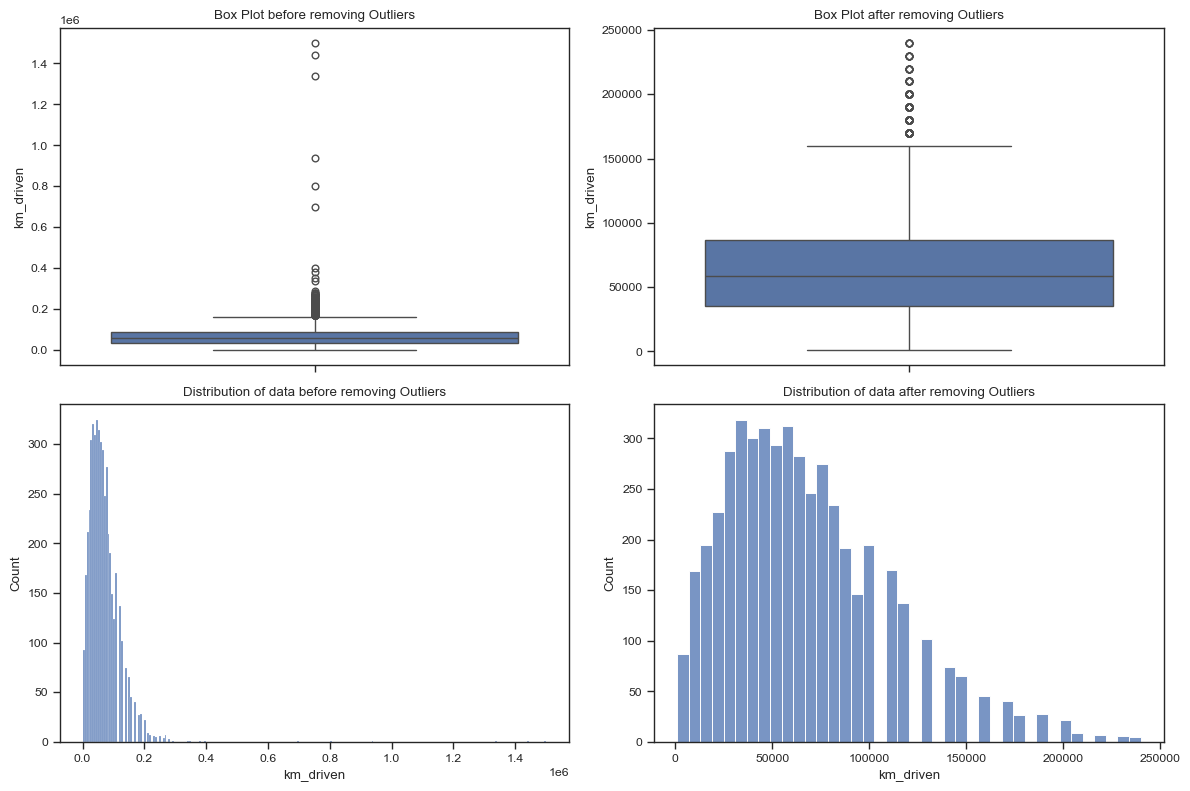

In [37]:
# Before and After of "km_driven" column
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,8))
sns.boxplot(cars['km_driven'], ax=ax[0,0])
sns.boxplot(updated_cars['km_driven'], ax=ax[0,1])
sns.histplot(cars['km_driven'], ax=ax[1,0])
sns.histplot(updated_cars['km_driven'], ax=ax[1,1])
ax[0,0].set_title('Box Plot before removing Outliers')
ax[0,1].set_title('Box Plot after removing Outliers')
ax[1,0].set_title('Distribution of data before removing Outliers')
ax[1,1].set_title('Distribution of data after removing Outliers')
plt.tight_layout()
plt.show()

<details>
  <summary style="color:white;background:navy;font-weight:bold;cursor:pointer;">
    🔹 What the Visualization Shows (Click to expand)
  </summary>

  <h4>📊 Top row (Boxplots)</h4>
  <ul>
    <li>✅ <b>Before:</b> Boxplot shows many <b>outliers</b> (dots far away from the box).</li>
    <li>✅ <b>After:</b> Outliers are removed, so the boxplot is tighter and better represents the bulk of the data.</li>
  </ul>

  <h4>📊 Bottom row (Histograms)</h4>
  <ul>
    <li>✅ <b>Before:</b> Distribution is heavily <b>skewed</b> due to extreme values.</li>
    <li>✅ <b>After:</b> Distribution is more <b>concentrated</b> and easier to interpret.</li>
  </ul>

</details>


----------------------------------
----------------------------------


## Handling `price` Column

- 99th percentile of 'price' column is ₹43,75,000 which means that 99% of the data points lie below ₹43,75,000.
- However, the maximum value is ₹2,50,00,000 which is significantly higher than the rest of the distribution.
- This extreme value is likely an outlier and may distort statistical analyses such as the mean or standard deviation.
- Therefore, it should be carefully examined and handled appropriately.

In [38]:
# Description of "price" column
price_describe = updated_cars.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])['price'].apply(lambda x: f"{x:.2f}")
price_describe

count       4807.00
mean      616560.64
std       414469.95
min        36000.00
1%        100000.00
5%        166000.00
10%       219000.00
25%       335000.00
50%       522000.00
75%       784000.00
90%      1140400.00
95%      1407700.00
99%      1898200.00
max      7900000.00
Name: price, dtype: object

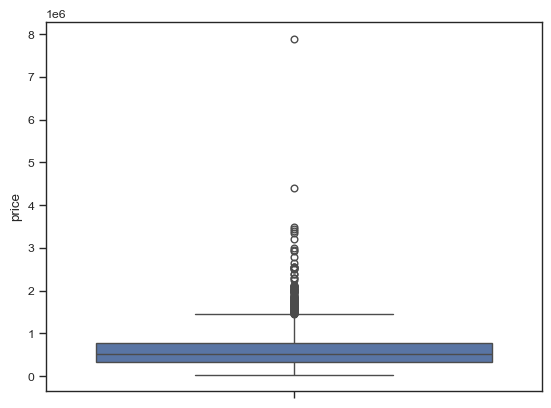

In [39]:
# Box Plot of "price" column
sns.boxplot(updated_cars['price'])
plt.show()

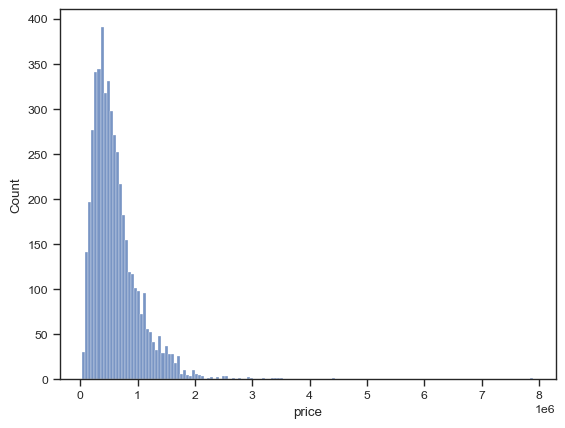

In [40]:
# Distribution of "price" column
sns.histplot(updated_cars['price'])
plt.show()

<details>
  <summary style="color:white;background:navy;font-weight:bold; cursor:pointer;">
    💰 Outlier Treatment for "price" Column (Click to expand)
  </summary>

  <h4>🔹 Why handle outliers?</h4>
  <ul>
    <li>✅ The <b>price column</b> ranges from a few lakhs to as high as <b>₹80,00,000+</b>.</li>
    <li>✅ While most cars are in the affordable segment, some entries are <b>luxury or erroneous values</b>.</li>
    <li>✅ These outliers <b>distort analysis and models</b>, so we need to clean them.</li>
  </ul>

  <h4>⚡ Step 1 : Removing Suspiciously Extreme Values (Percentiles)</h4>
  <ul>
    <li>✅ Remove <b>below 1st percentile</b> → extremely low/suspicious prices.</li>
    <li>✅ Remove <b>above 99th percentile</b> → rare luxury cars or input errors.</li>
    <li>➡️ This step trims the most unrealistic values first.</li>
  </ul>

  <h4>⚡ Step 2 : Removing Remaining Outliers (IQR Method)</h4>
  <ul>
    <li>✅ Compute <b>Q1 (25th percentile)</b> and <b>Q3 (75th percentile)</b>.</li>
    <li>✅ <b>IQR = Q3 – Q1</b>.</li>
    <li>✅ Define stricter thresholds:
      <ul>
        <li>Lower Limit = Q1 – 3 × IQR</li>
        <li>Upper Limit = Q3 + 3 × IQR</li>
      </ul>
    </li>
    <li>➡️ Values outside these bounds are flagged as <b>outliers</b> and removed.</li>
  </ul>

  <h4>🎯 Final Outcome</h4>
  <ul>
    <li>✅ <b>Percentile filtering</b> removes the most extreme cases.</li>
    <li>✅ <b>IQR filtering</b> handles the rest, ensuring prices are realistic.</li>
    <li>✅ Dataset now <b>represents true market car prices</b> more accurately.</li>
  </ul>
</details>


-------------------

In [41]:
# Detecting Suspiciously Extreme Outliers using Percentiles
updated_cars[(updated_cars['price'] < float(price_describe['1%'])) | (updated_cars['price'] > float(price_describe['99%']))]

,km_driven,fuel_type,transmission,owner,engine_capacity,price,year,brand,model
259,87380,Petrol,Automatic,1st owner,1984,1942000,2020,Volkswagen,TIGUAN
331,52120,Diesel,Manual,1st owner,1493,2047000,2023,KIA,SELTOS
351,120000,Diesel,Manual,3rd owner,1399,72000,2011,Ford,Figo
362,40420,Petrol,Manual,2nd owner,627,50000,2011,Tata,Nano
379,78100,Diesel,Automatic,2nd owner,1493,2020000,2021,KIA,SELTOS
...,...,...,...,...,...,...,...,...,...
4634,120000,Diesel,Automatic,2nd owner,1996,2550000,2021,Ford,Endeavour
4642,160000,Petrol,Manual,3rd owner,1197,61000,2011,Hyundai,i10
4658,90180,Petrol,Manual,3rd owner,1086,94000,2012,Hyundai,Santro Xing
4670,8750,Petrol,Automatic,1st owner,1451,2050000,2024,MG,HECTOR PLUS


#### This code detects outliers in the price column based on percentiles (1% & 99%), without removing them yet.

In [42]:
# Index of Suspiciously Extreme Outliers
extreme_outlier_idx = updated_cars[(updated_cars['price'] < float(price_describe['1%'])) | (updated_cars['price'] > float(price_describe['99%']))].index
extreme_outlier_idx

Index([ 259,  331,  351,  362,  379,  390,  420,  423,  447,  478,  480,  533,
        558,  605,  620, 1141, 1200, 1246, 1260, 1339, 1365, 1412, 1631, 1981,
       2007, 2108, 2321, 2364, 2432, 2466, 2496, 2504, 2531, 2562, 2604, 2620,
       2636, 2638, 2640, 2651, 2659, 2666, 2677, 3001, 3051, 3068, 3070, 3095,
       3111, 3143, 3214, 3228, 3235, 3237, 3283, 3285, 3302, 3304, 3352, 3360,
       3395, 3425, 3430, 3442, 3780, 3791, 3831, 3859, 3865, 3929, 3958, 3964,
       3967, 3976, 4053, 4057, 4091, 4097, 4098, 4100, 4102, 4103, 4145, 4150,
       4163, 4596, 4612, 4616, 4634, 4642, 4658, 4670, 4714],
      dtype='int64')

In [43]:

# First quartile or 25th percentile
q1 = updated_cars['price'].quantile(0.25)

# Third quartile or 75th percentile
q3 = updated_cars['price'].quantile(0.75)

In [44]:
# IQR = Q3 - Q1
iqr = q3 - q1

In [45]:
# Range of Extreme Outliers
extreme_lower_limit = q1 - 3*iqr
extreme_upper_limit = q3 + 3*iqr

In [46]:
# Detecting Extreme Outliers
updated_cars[(updated_cars['price'] < extreme_lower_limit) | (updated_cars['price'] > extreme_upper_limit)]

,km_driven,fuel_type,transmission,owner,engine_capacity,price,year,brand,model
1981,8210,Petrol,Automatic,1st owner,1997,2238000,2024,Mahindra,Thar Roxx
2007,22370,Diesel,Manual,2nd owner,2393,2529000,2021,Toyota,Innova Crysta
2108,7940,Petrol,Automatic,1st owner,1998,3450000,2022,BMW,2 SERIES GRAN COUPE
2432,14960,Petrol,Automatic,1st owner,1999,2550000,2023,Hyundai,Tucson
2504,35740,Diesel,Automatic,1st owner,2143,3498000,2019,Mercedes,Benz C Class
2562,46020,Diesel,Automatic,1st owner,1995,3200000,2021,BMW,X1
2620,14500,Petrol,Automatic,2nd owner,1991,4400000,2022,Mercedes,Benz GLA Class
2636,26830,Diesel,Automatic,2nd owner,1995,2397000,2019,BMW,3 Series
2638,100000,Diesel,Automatic,1st owner,1968,2500000,2018,Audi,A6
2640,3910,Petrol,Automatic,1st owner,1482,2293000,2024,Hyundai,Creta N Line


In [47]:
# Index of Extreme Outliers
extreme_outlier_idx = updated_cars[(updated_cars['price'] < extreme_lower_limit) | (updated_cars['price'] > extreme_upper_limit)].index
extreme_outlier_idx

Index([1981, 2007, 2108, 2432, 2504, 2562, 2620, 2636, 2638, 2640, 2651, 2659,
       3780, 3831, 3958, 3964, 3976, 4091, 4098, 4102, 4145, 4163, 4634],
      dtype='int64')

In [48]:
# Removing Extreme Outliers
updated_cars = updated_cars.drop(index=extreme_outlier_idx, axis=0)

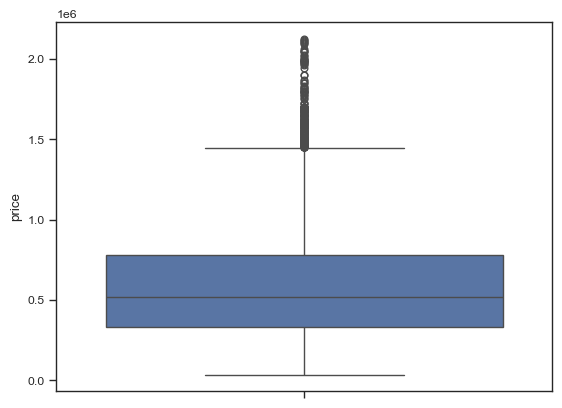

In [49]:
# Box Plot of "price" column after Outlier Removal
sns.boxplot(updated_cars['price'])
plt.show()

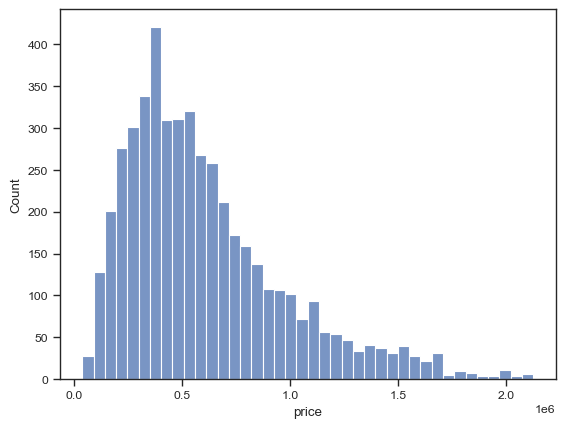

In [50]:
# Distribution of "price" column after Outlier Removal
sns.histplot(updated_cars['price'])
plt.show()

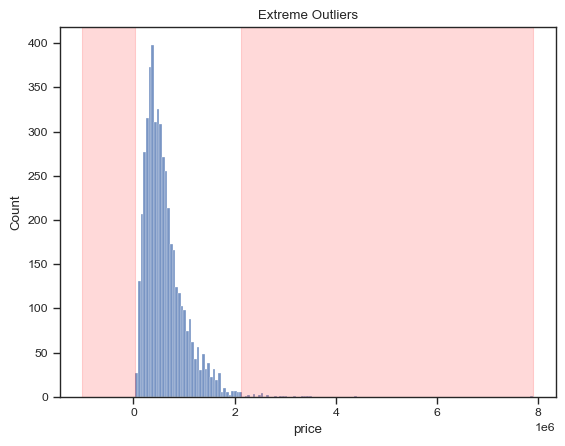

In [51]:
# Visual Representation of Outliers in the Data
sns.histplot(cars['price'])
plt.axvspan(xmin=extreme_lower_limit, xmax=cars['price'].min(), alpha=0.15, color='red')
plt.axvspan(xmin=extreme_upper_limit, xmax=cars['price'].max(), alpha=0.15, color='red')
plt.title('Extreme Outliers')
plt.show()

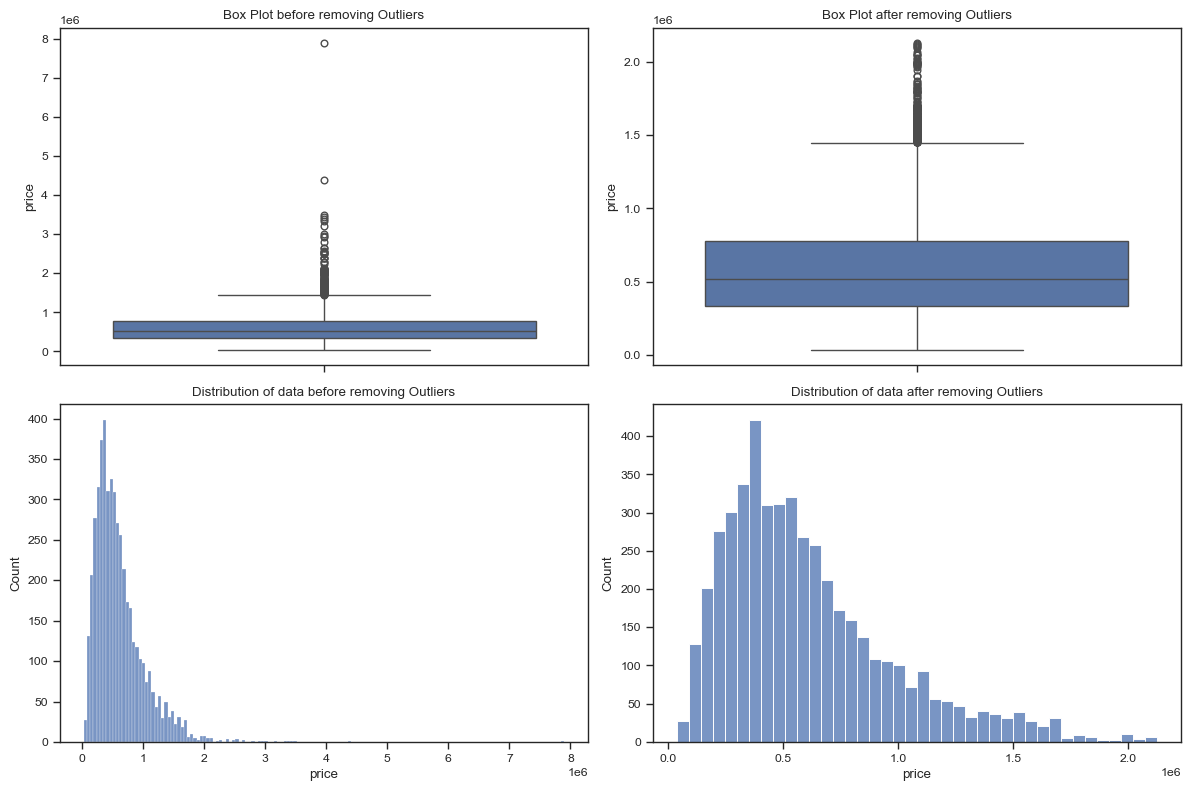

In [52]:
# Before and After of "price" column
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,8))
sns.boxplot(cars['price'], ax=ax[0,0])
sns.boxplot(updated_cars['price'], ax=ax[0,1])
sns.histplot(cars['price'], ax=ax[1,0])
sns.histplot(updated_cars['price'], ax=ax[1,1])
ax[0,0].set_title('Box Plot before removing Outliers')
ax[0,1].set_title('Box Plot after removing Outliers')
ax[1,0].set_title('Distribution of data before removing Outliers')
ax[1,1].set_title('Distribution of data after removing Outliers')
plt.tight_layout()
plt.show()

### Handling `engine_capacity` Column

---

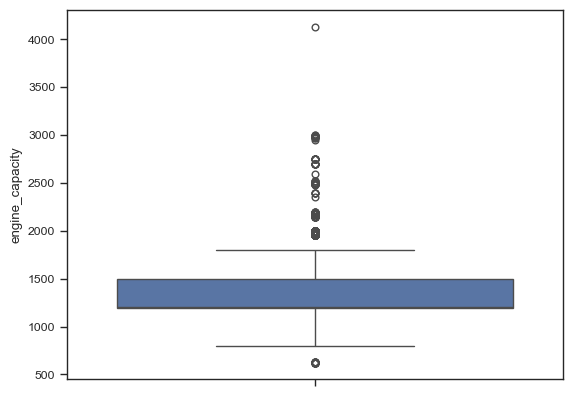

In [53]:
# Box Plot of "engine_capacity" column
sns.boxplot(updated_cars['engine_capacity'])
plt.show()

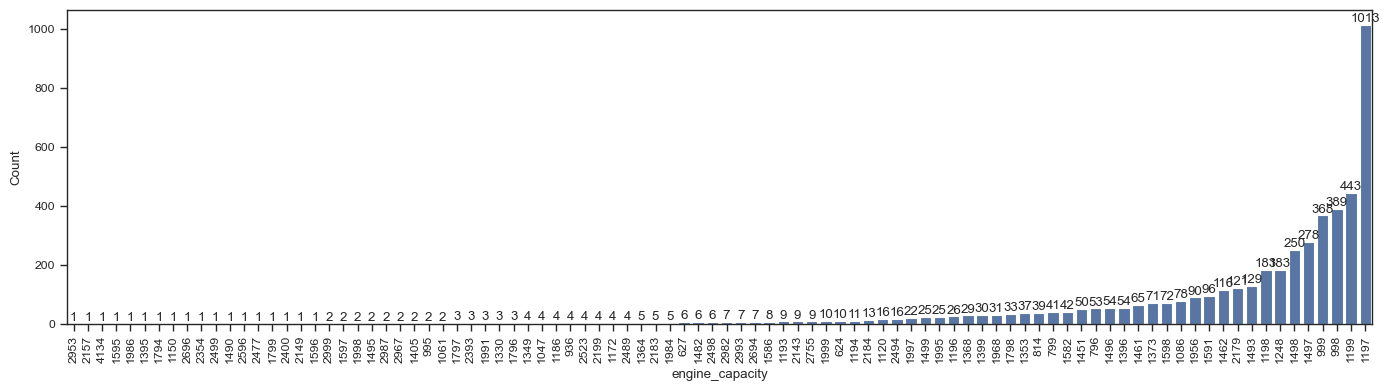

In [54]:
# Frequency Distribution of "engine_capacity" column
# As we can see, there are lots of rare categories, which may be noise and can cause overfitting
plt.figure(figsize=(14,4))
ax = sns.countplot(data=updated_cars, x='engine_capacity', order=updated_cars['engine_capacity'].value_counts().sort_values().index)
ax.bar_label(ax.containers[0])
plt.xlabel('engine_capacity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [55]:
# Frequency Distribution of "engine_capacity" column
engine_freq = updated_cars['engine_capacity'].value_counts()
engine_freq

engine_capacity
1197    1013
1199     443
998      389
999      368
1497     278
        ... 
1150       1
2696       1
2354       1
2400       1
1799       1
Name: count, Length: 92, dtype: int64

In [56]:
# Selecting "engine_capacity" having count greater than or equal to 4 as "top_engines"
top_engines = engine_freq[engine_freq >= 4].index
top_engines

Index([1197, 1199,  998,  999, 1497, 1498, 1198, 1248, 1493, 2179, 1462, 1591,
       1956, 1086, 1598, 1373, 1461, 1496, 1396,  796, 1451, 1582,  799,  814,
       1353, 1798, 1968, 1399, 1368, 1196, 1995, 1499, 1997, 1120, 2494, 2184,
       1194, 1999,  624, 1193, 2143, 2755, 1586, 2993, 2694, 2982, 2498,  627,
       1482, 1984, 1364, 2183, 2489, 1172, 2199, 2523,  936, 1186, 1047, 1349],
      dtype='int16', name='engine_capacity')

In [57]:

# Removing rare categories from "engine_capacity" column
updated_cars = updated_cars[updated_cars['engine_capacity'].isin(top_engines)]

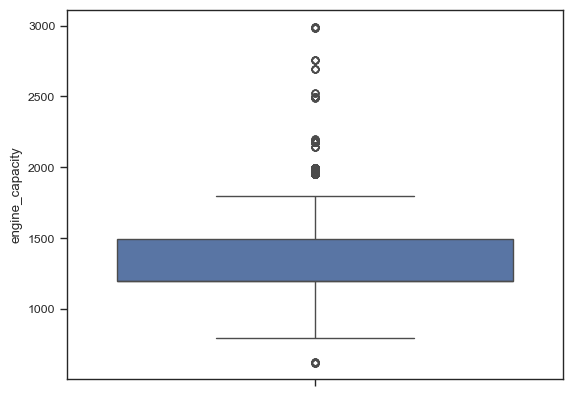

In [58]:
# Box Plot of "engine_capacity" column after transformation
sns.boxplot(updated_cars['engine_capacity'])
plt.show()

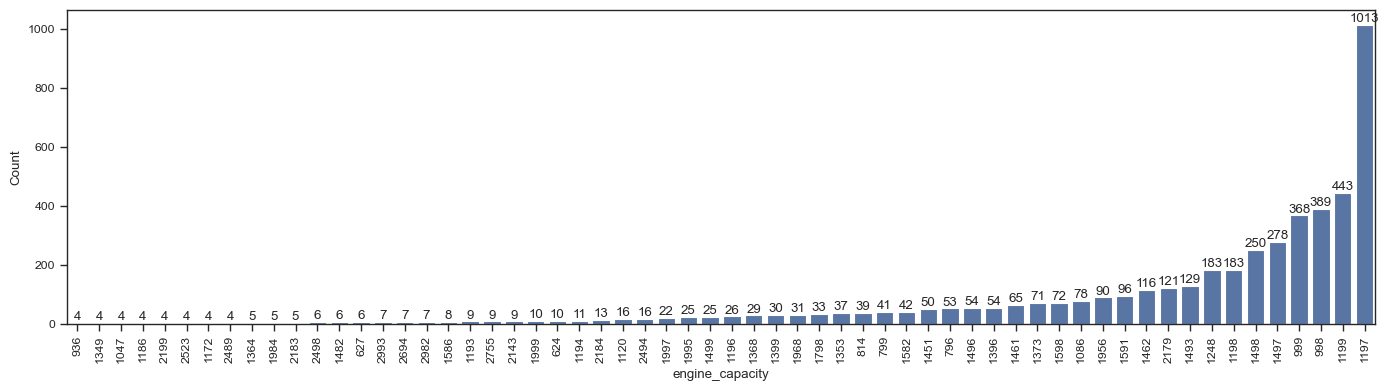

In [59]:

# Frequency Distribution of "engine_capacity" column after transformation
plt.figure(figsize=(14,4))
ax = sns.countplot(data=updated_cars, x='engine_capacity', order=updated_cars['engine_capacity'].value_counts().sort_values().index)
ax.bar_label(ax.containers[0])
plt.xlabel('engine_capacity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Handling `brand` Column

---

In [60]:
# Frequency Distribution of "brand" column
# As we can see, there are some brands with very few cars as compared to other brands (rare categories)
# Also there are some car brands that are removed from the data but the brand name still exist in the column
# This is because we have converted the "brand" column into category datatype, so we have to remove these categories manually
brand_freq = updated_cars['brand'].value_counts()
brand_freq

brand
Maruti        1147
Hyundai        963
Tata           510
Honda          362
Renault        317
Mahindra       247
Ford           193
KIA            180
Volkswagen     151
Toyota         140
Skoda          124
MG             104
Nissan          91
Jeep            49
Datsun          40
BMW             26
Chevrolet       25
Fiat            24
Audi            18
Mercedes         9
Jaguar           4
Landrover        3
CITROEN          3
Premier          1
Mini             1
Ashok            1
Force            0
ISUZU            0
Mitsubishi       0
Ssangyong        0
Volvo            0
Name: count, dtype: int64

In [61]:
# Selecting "brand" having count greater than 10 as "top_brands"
top_brands = brand_freq[brand_freq > 10].index
top_brands

CategoricalIndex(['Maruti', 'Hyundai', 'Tata', 'Honda', 'Renault', 'Mahindra',
                  'Ford', 'KIA', 'Volkswagen', 'Toyota', 'Skoda', 'MG',
                  'Nissan', 'Jeep', 'Datsun', 'BMW', 'Chevrolet', 'Fiat',
                  'Audi'],
                 categories=['Ashok', 'Audi', 'BMW', 'CITROEN', ..., 'Tata', 'Toyota', 'Volkswagen', 'Volvo'], ordered=False, dtype='category', name='brand')

In [62]:
# Removing rare categories from "brand" column
updated_cars = updated_cars[updated_cars['brand'].isin(top_brands)]

In [63]:
# Because we have converted "brand" column into category datatype, we also have to remove unused categories manually
updated_cars['brand'] = updated_cars['brand'].cat.remove_unused_categories()

In [64]:
# Frequency Distribution of "brand" column after transformation
updated_cars['brand'].value_counts()

brand
Maruti        1147
Hyundai        963
Tata           510
Honda          362
Renault        317
Mahindra       247
Ford           193
KIA            180
Volkswagen     151
Toyota         140
Skoda          124
MG             104
Nissan          91
Jeep            49
Datsun          40
BMW             26
Chevrolet       25
Fiat            24
Audi            18
Name: count, dtype: int64

### Handling `model` Column

---

In [65]:
# Frequency Distribution of "model" column
# As we can see, there are some model name that are removed from the data but the model name still exist in the column
# This is because we have converted the "model" column into category datatype, so we have to remove these categories manually
updated_cars['model'].value_counts()

model
NEXON        177
Swift        151
City         147
Grand i10    145
Baleno       142
            ... 
WRANGLER       0
XF             0
XC 60          0
Wagon R        0
iX             0
Name: count, Length: 230, dtype: int64

In [66]:

# Removing unused categories from "model" column
updated_cars['model'] = updated_cars['model'].cat.remove_unused_categories()

In [67]:
# Frequency Distribution of "model" column
# As we can see, there are some models with very few occurrence as compared to other models (rare categories)
model_freq = updated_cars['model'].value_counts()
model_freq

model
NEXON             177
Swift             151
City              147
Grand i10         145
Baleno            142
                 ... 
Sail UVA            1
TIAGO EV            1
Verito Vibe CS      1
X3                  1
XCENT PRIME         1
Name: count, Length: 189, dtype: int64

In [68]:
# Selecting "model" having count greater than or equal to 2 as "top_models"
top_models = model_freq[model_freq >= 2].index
top_models

CategoricalIndex(['NEXON', 'Swift', 'City', 'Grand i10', 'Baleno', 'Kwid',
                  'Creta', 'Wagon R 1.0', 'Ecosport', 'Elite i20',
                  ...
                  'Safari Storme', 'Classic', 'A3', 'Lodgy', 'Bolt', 'Verito',
                  'SCORPIO CLASSIC', 'Scala', 'Q3', 'URBAN CRUISER HYRYDER'],
                 categories=['3 Series', '5 Series', 'A Star', 'A3', ..., 'Zest', 'i10', 'i20', 'i20 Active'], ordered=False, dtype='category', name='model', length=162)

In [69]:
# Removing rare categories from "model" column
updated_cars = updated_cars[updated_cars['model'].isin(top_models)]

In [70]:
# Removing unused categories from "model" column
updated_cars['model'] = updated_cars['model'].cat.remove_unused_categories()

In [71]:
# Frequency Distribution of "model" column after transformation
updated_cars['model'].value_counts()

model
NEXON                    177
Swift                    151
City                     147
Grand i10                145
Baleno                   142
                        ... 
Q3                         2
Scala                      2
SCORPIO CLASSIC            2
Verito                     2
URBAN CRUISER HYRYDER      2
Name: count, Length: 162, dtype: int64

In [72]:
# Resetting Index
updated_cars.reset_index(drop=True, inplace=True)

### Exporting Outlier Free DataFrame as Parquet File

---

In [73]:
# Importing export_as_parquet function from export_data module
from export_data import export_as_parquet
export_as_parquet(updated_cars, 'clean_data', 'clean_data_with_no_outlier.parquet')

Successfully exported the DataFrame as 'clean_data_with_no_outlier.parquet'


-------------------------

just extatracting details

In [75]:
updated_cars['model'].unique()

['Eon', 'Alto 800', 'Wagon R 1.0', 'Tiago', 'i20', ..., 'Santa Fe', 'A6', 'ZS EV', 'TIGOR EV', 'SCORPIO CLASSIC']
Length: 162
Categories (162, object): ['3 Series', '5 Series', 'A Star', 'A3', ..., 'Zest', 'i10', 'i20', 'i20 Active']

In [76]:
print(updated_cars['model'].cat.categories.tolist())


['3 Series', '5 Series', 'A Star', 'A3', 'A4', 'A6', 'ALCAZAR', 'ALTROZ', 'ASTOR', 'AURA', 'Alto', 'Alto 800', 'Alto K10', 'Amaze', 'Ameo', 'BOLERO NEO', 'BR-V', 'BREZZA', 'Baleno', 'Beat', 'Bolero', 'Bolt', 'Brio', 'CARENS', 'Captur', 'Celerio', 'Celerio X', 'Ciaz', 'City', 'Classic', 'Compass', 'Corolla Altis', 'Creta', 'Duster', 'Dzire', 'E20 Plus', 'E2O', 'ELEVATE', 'EXTER', 'Ecosport', 'Eeco', 'Elite i20', 'Eon', 'Ertiga', 'Etios', 'Etios Liva', 'FREESTYLE', 'FRONX', 'Fabia', 'Fiesta', 'Figo', 'Figo Aspire', 'Fortuner', 'GRAND I10 NIOS', 'Glanza', 'Go', 'Go Plus', 'Grand Punto', 'Grand Vitara', 'Grand i10', 'HECTOR', 'HECTOR PLUS', 'Harrier', 'Hexa', 'IGNIS', 'Indica EV2', 'Indica Vista', 'Indigo ECS', 'Innova', 'Innova Crysta', 'JIMNY', 'Jazz', 'KUSHAQ', 'KUV 100 NXT', 'Kicks', 'Kiger', 'Kuv100', 'Kwid', 'Laura', 'Linea', 'Lodgy', 'MAGNITE', 'MARAZZO', 'Manza', 'Micra', 'Micra Active', 'Mobilio', 'NEW I20', 'NEW I20 N LINE', 'NEW SANTRO', 'NEXON', 'NEXON EV', 'Nano', 'New Elantra